In [ ]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
%matplotlib inline

In [ ]:
# connect colab to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Data

In [ ]:
#Loading necccesary libraries
TSLA = pd.read_csv('/content/drive/MyDrive/IST 652/Final Project/TSLA.csv',sep=',')
FORD = pd.read_csv('/content/drive/MyDrive/IST 652/Final Project/Ford.csv',sep=',')
GM =   pd.read_csv('/content/drive/MyDrive/IST 652/Final Project/GM.csv',sep=',')

View Data

In [ ]:
TSLA.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-30,19.573999,19.915333,19.500000,19.593332,19.593332,63423000
1,2018-05-01,19.567333,20.054667,19.548000,19.994667,19.994667,69384000
2,2018-05-02,19.904667,20.456667,19.851999,20.076668,20.076668,134556000
3,2018-05-03,18.586000,19.202667,18.348667,18.963333,18.963333,260281500
4,2018-05-04,18.866667,19.790667,18.634666,19.606001,19.606001,128541000


In [ ]:
FORD.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-30,11.53,11.73,11.22,11.24,8.988254,66090900
1,2018-05-01,11.25,11.35,11.10,11.26,9.004244,61430400
2,2018-05-02,11.26,11.27,11.12,11.21,8.964263,41899500
3,2018-05-03,11.17,11.21,10.97,11.20,8.956266,38907400
4,2018-05-04,11.16,11.41,11.09,11.36,9.084212,32043500


In [ ]:
GM.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-30,37.880001,38.070000,36.740002,36.740002,33.573769,11967300
1,2018-05-01,36.759998,36.959999,35.889999,36.419998,33.281353,11381200
2,2018-05-02,36.480000,36.700001,36.150002,36.200001,33.080315,9440700
3,2018-05-03,35.990002,36.169998,35.279999,36.150002,33.034615,15742600
4,2018-05-04,36.150002,36.779999,35.869999,36.709999,33.546356,6639000


#Data Cleaning

In [ ]:
TSLA.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
TSLA['Date'] = pd.to_datetime(TSLA['Date'])#Converting into Date format

In [ ]:
TSLA['Date'].dtype

dtype('<M8[ns]')

In [ ]:
FORD.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
FORD['Date'] = pd.to_datetime(FORD['Date'])

In [ ]:
GM['Date'] = pd.to_datetime(GM['Date'])

In [ ]:
#Renaming the columns to prepare for data merging
TSLA.rename(columns={'Open': 'TSLA_Open', 'High': 'TSLA_High' ,'Low': 'TSLA_Low', 'Close': 'TSLA_Close', 'Adj Close': 'TSLA_Adj_Close', 'Volume': 'TSLA_Volume'}, inplace=True)

In [ ]:
#Renaming the columns to prepare for data merging
FORD.rename(columns={'Open': 'FORD_Open', 'High': 'FORD_High' ,'Low': 'FORD_Low', 'Close': 'FORD_Close', 'Adj Close': 'FORD_Adj_Close', 'Volume': 'FORD_Volume'}, inplace=True)

In [ ]:
#Renaming the columns to prepare for data merging
GM.rename(columns={'Open': 'GM_Open', 'High': 'GM_High' ,'Low': 'GM_Low', 'Close': 'GM_Close', 'Adj Close': 'GM_Adj_Close', 'Volume': 'GM_Volume'}, inplace=True)

In [ ]:
#Merged all the dataframes into single dataframe
merged_df = pd.merge(TSLA, FORD, on='Date', how='inner')
df = pd.merge(merged_df, GM, on='Date', how='inner')

In [ ]:
#summary stats for the data
df.describe()

,TSLA_Open,TSLA_High,TSLA_Low,TSLA_Close,TSLA_Adj_Close,TSLA_Volume,FORD_Open,FORD_High,FORD_Low,FORD_Close,FORD_Adj_Close,FORD_Volume,GM_Open,GM_High,GM_Low,GM_Close,GM_Adj_Close,GM_Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,141.760475,145.057037,138.137490,141.673788,141.673788,1.361551e+08,11.235044,11.404027,11.054241,11.229126,9.975556,6.329909e+07,40.225584,40.784440,39.615147,40.198499,39.339156,1.462538e+07
std,114.949859,117.539505,111.993823,114.772623,114.772623,8.958758e+07,3.652281,3.733152,3.572358,3.657180,3.436545,3.407671e+07,9.857043,9.954789,9.727494,9.849320,9.989988,7.520972e+06
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07,4.270000,4.420000,3.960000,4.010000,3.589956,1.188160e+07,16.340000,18.559999,14.330000,16.799999,16.685663,2.924200e+06
25%,21.894334,22.420666,21.525334,22.042333,22.042333,7.800075e+07,8.850000,8.960000,8.775000,8.840000,7.569915,4.062790e+07,34.879999,35.244999,34.315000,34.754999,33.548178,9.744600e+06
50%,139.956665,142.926666,136.000000,140.093338,140.093338,1.071315e+08,10.590000,10.840000,10.450000,10.570000,8.857569,5.594110e+07,38.029999,38.400002,37.509998,38.040001,36.512127,1.302720e+07
75%,235.556671,239.885003,231.284996,236.125000,236.125000,1.655468e+08,13.115000,13.370000,12.910000,13.130000,12.249726,7.608525e+07,43.930001,44.350001,43.354999,43.820000,43.012495,1.740770e+07
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08,24.870001,25.870001,24.370001,25.190001,22.664917,3.116452e+08,65.519997,67.209999,62.689999,65.739998,65.292580,6.766720e+07


In [ ]:
#creating year column to perform yearwise analysis
df['Year'] = df['Date'].dt.year

# Data Analysis

In [ ]:
#1. Unit of Analysis:- Close
df.groupby('Year')[['TSLA_Close', 'FORD_Close','GM_Close']].mean()

,TSLA_Close,FORD_Close,GM_Close
Year,,,
2018,21.069722,9.997882,36.781765
2019,18.235347,9.238651,37.562976
2020,96.665689,7.046996,30.481660
2021,259.998162,14.221587,55.883770
2022,263.093081,14.872470,40.233705
2023,175.034815,12.468765,37.011235


In [ ]:
#2. Unit of Analysis:- Volume 
df.groupby('Year')[['TSLA_Volume', 'FORD_Volume','GM_Volume']].mean()

,TSLA_Volume,FORD_Volume,GM_Volume
Year,,,
2018,1.398376e+08,4.220170e+07,1.240585e+07
2019,1.373838e+08,3.828724e+07,8.763544e+06
2020,2.259239e+08,7.670796e+07,1.538326e+07
2021,8.217489e+07,7.886394e+07,1.914958e+07
2022,8.693633e+07,7.266885e+07,1.651395e+07
2023,1.646703e+08,6.605154e+07,1.522573e+07


#Data Visulization

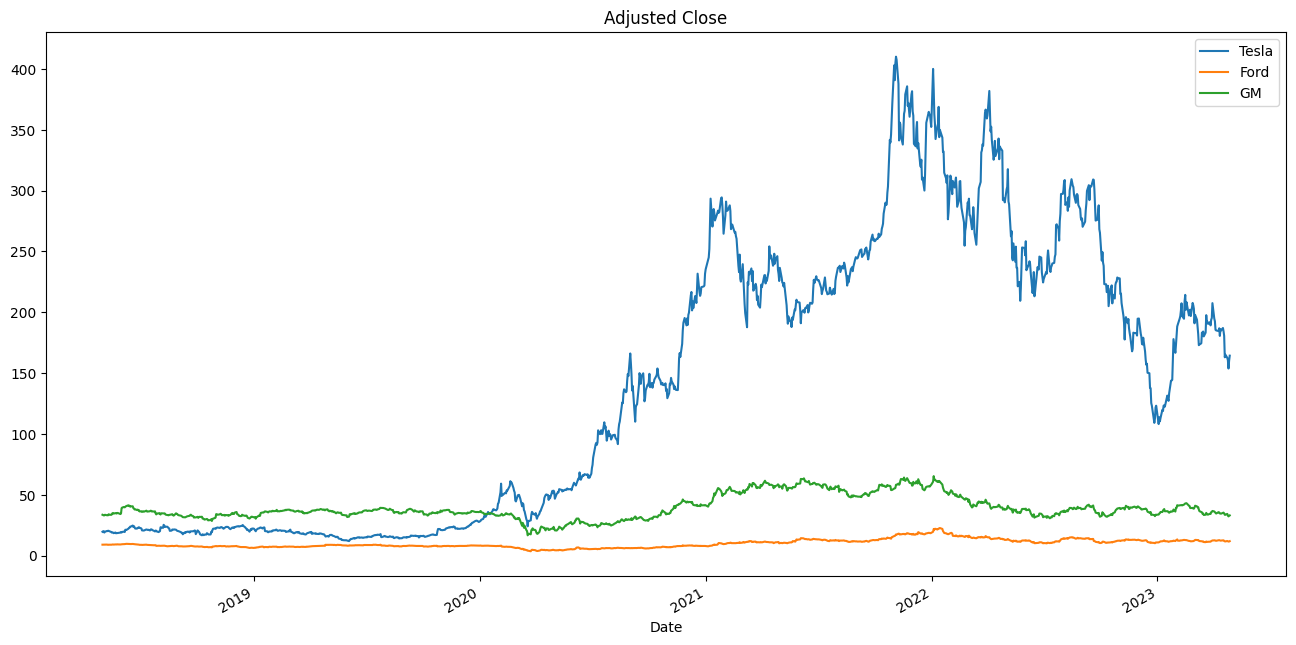

In [ ]:
pl = df
pl.set_index('Date', inplace=True)
pl['TSLA_Adj_Close'].plot(label='Tesla',figsize=(16,8),title='Adjusted Close')
pl['FORD_Adj_Close'].plot(label='Ford')
pl['GM_Adj_Close'].plot(label='GM')
plt.legend();

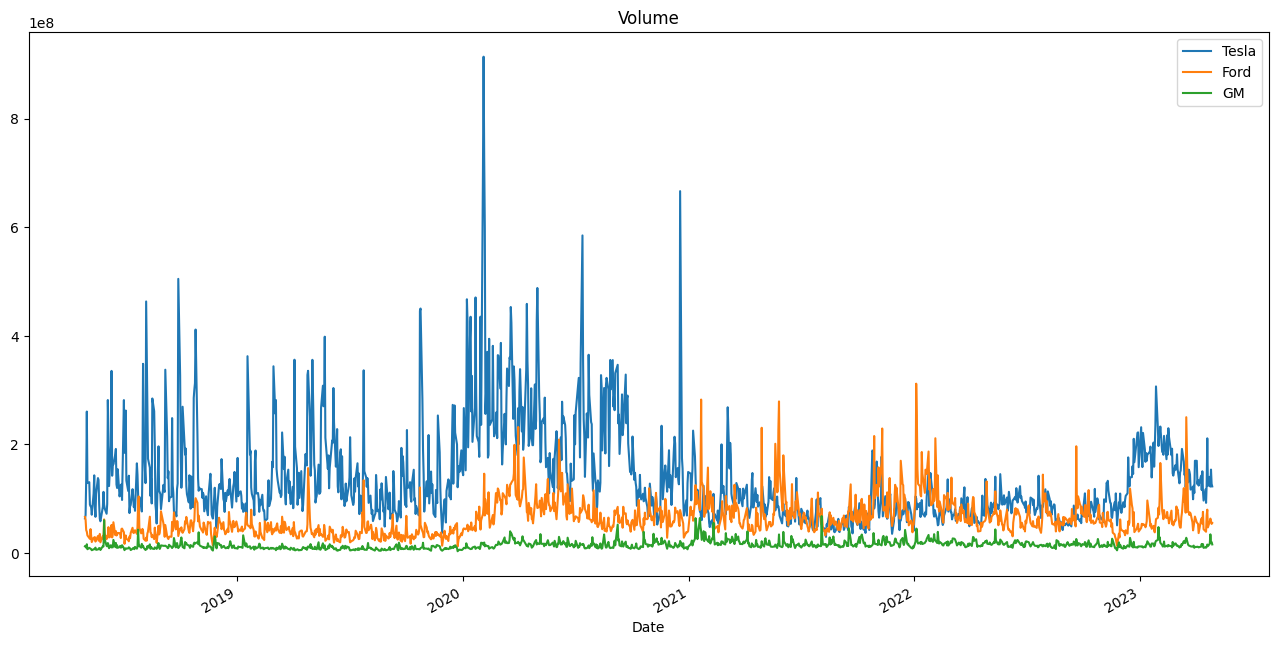

In [ ]:
# Volume of Stock traded every day
pl['TSLA_Volume'].plot(label='Tesla',figsize=(16,8),title='Volume')
pl['FORD_Volume'].plot(label='Ford')
pl['GM_Volume'].plot(label='GM')
plt.legend();

The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately, our current data doesn’t have that information about total units of the stock present. But what we can do as a simple calculation to try to represent total money traded would be to multiply the Volume column by the Open price. Remember that this still isn’t the actual Market Cap, it's just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at $10 each versus 100000 units of stock at $1 each)

Create a new column for each dataframe called “Total Traded” which is the Open Price multiplied by the Volume Traded.



In [ ]:
df['TSLA_Total_Traded'] = df['TSLA_Open']*df['TSLA_Volume']
df['FORD_Total_Traded'] = df['FORD_Open']*df['FORD_Volume']
df['GM_Total_Traded'] = df['GM_Open']*df['GM_Volume']

In [ ]:
#3. Unit of Analysis:- Total Traded
df.groupby('Year')[['TSLA_Total_Traded', 'FORD_Total_Traded','GM_Total_Traded']].mean()

,TSLA_Total_Traded,FORD_Total_Traded,GM_Total_Traded
Year,,,
2018,2.941456e+09,4.164173e+08,4.565476e+08
2019,2.490886e+09,3.527928e+08,3.285970e+08
2020,1.932218e+10,5.229914e+08,4.601738e+08
2021,2.135260e+10,1.140682e+09,1.065080e+09
2022,2.211110e+10,1.145318e+09,6.811781e+08
2023,2.847383e+10,8.211408e+08,5.633885e+08


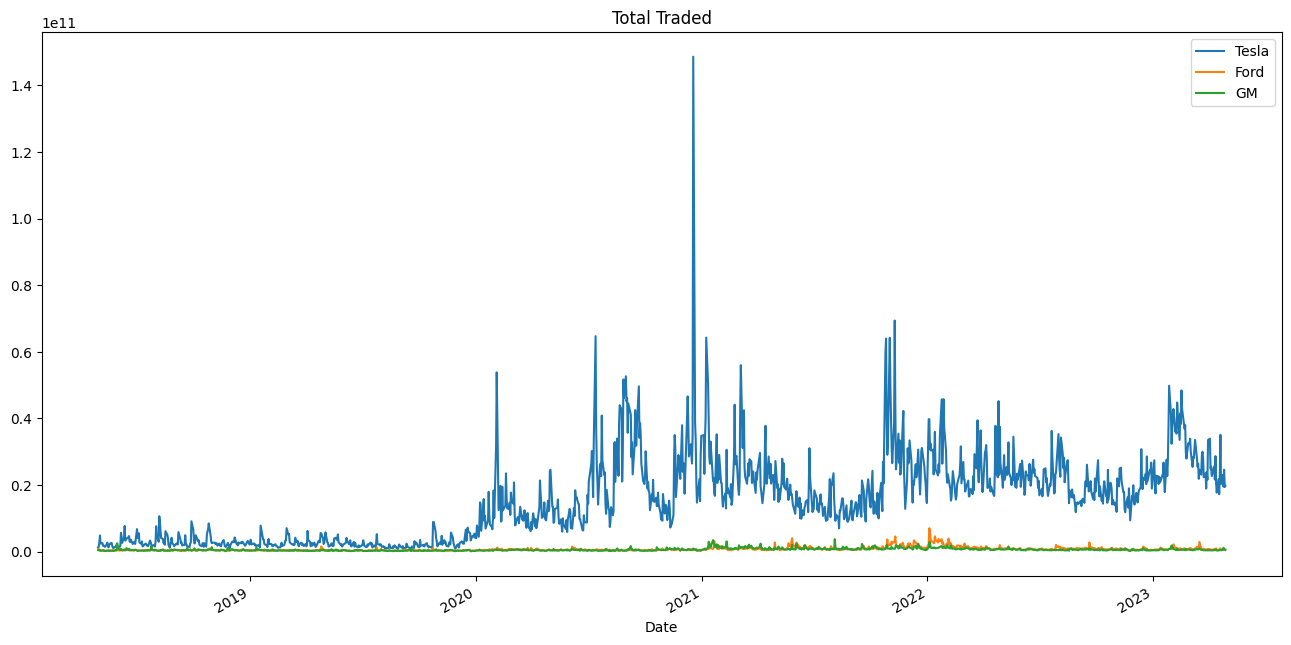

In [ ]:
pl = df
pl['TSLA_Total_Traded'].plot(label='Tesla',figsize=(16,8),title='Total Traded')
pl['FORD_Total_Traded'].plot(label='Ford')
pl['GM_Total_Traded'].plot(label='GM')
plt.legend();

#Basic financial analysis, by calculating and comparing daily returns, and plotting it to identify relationships.

Daily Percentage Change
Calculate the return from the Close price column.

In [ ]:
# Daily Percentage Change
#First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:
# rt = (pt/(pt−1)) − 1
# This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1.
#Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day.
#While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock.
#If daily returns have a wide distribution, the stock is more volatile from one day to the next.
#Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

In [ ]:
df['TSLA_Returns'] = df['TSLA_Close'].pct_change(1)
df['FORD_Returns'] = df['FORD_Close'].pct_change(1)
df['GM_Returns'] = df['GM_Close'].pct_change(1)

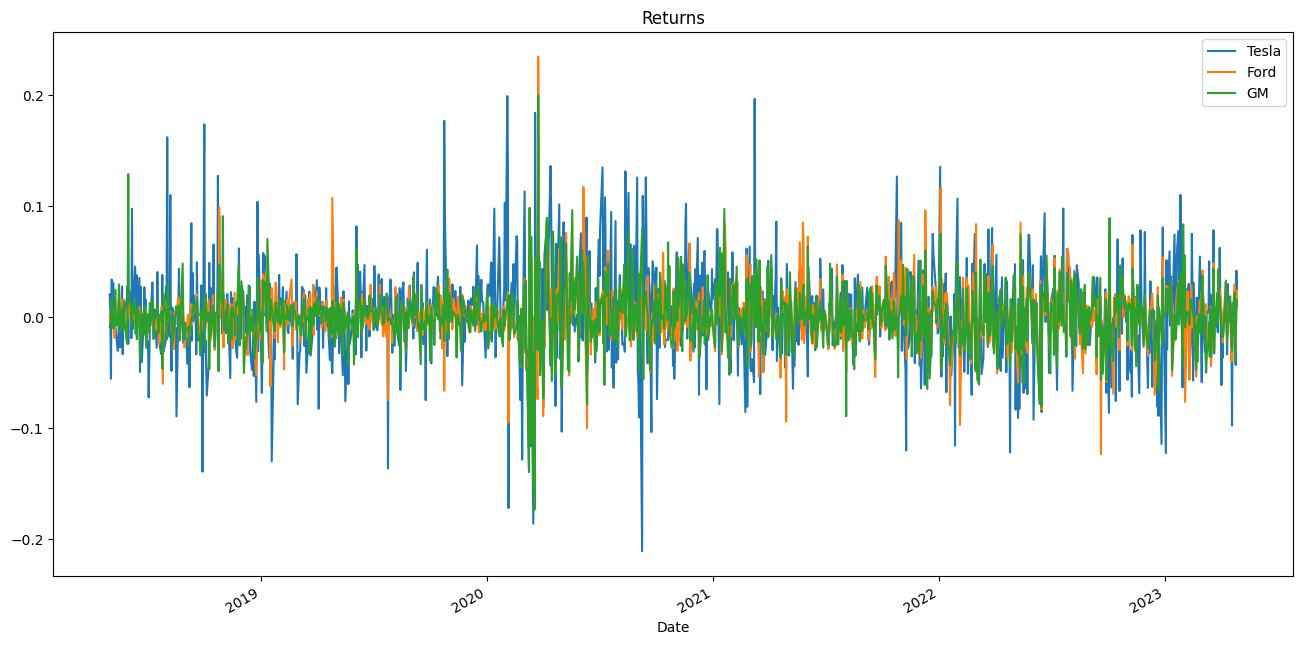

In [ ]:
pl = df
pl['TSLA_Returns'].plot(label='Tesla',figsize=(16,8),title='Returns')
pl['FORD_Returns'].plot(label='Ford')
pl['GM_Returns'].plot(label='GM')
plt.legend();

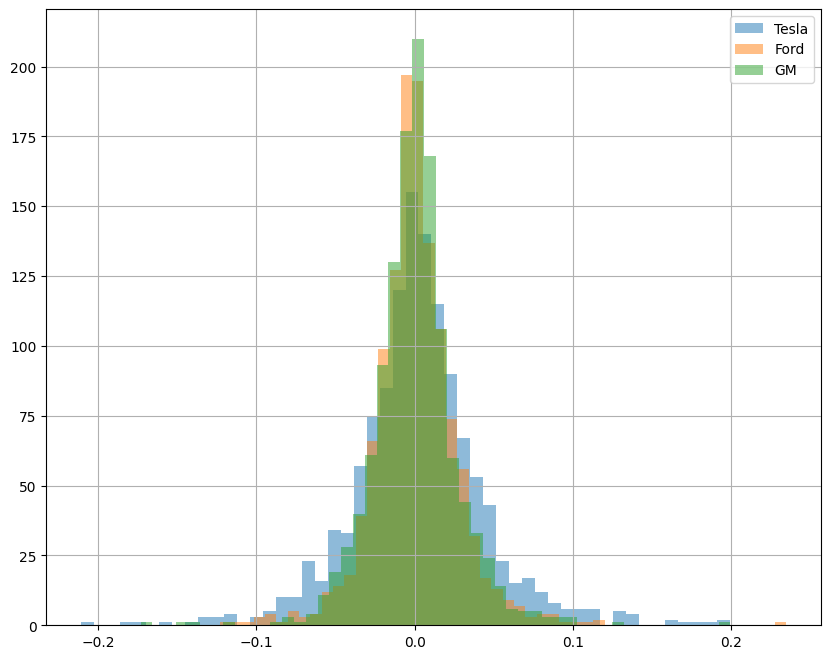

In [ ]:
pl['TSLA_Returns'].hist(bins=50,label='Tesla',figsize=(10,8),alpha=0.5)
pl['FORD_Returns'].hist(bins=50,label='Ford',alpha=0.5)
pl['GM_Returns'].hist(bins=50,label='GM',alpha=0.5)
plt.legend();

In [ ]:
#4. Unit of Analysis:- Returns
df.groupby('Year')[['TSLA_Returns', 'FORD_Returns','GM_Returns']].mean()

,TSLA_Returns,FORD_Returns,GM_Returns
Year,,,
2018,0.001508,-0.002131,-0.000340
2019,0.001391,0.000924,0.000476
2020,0.010047,0.000395,0.001252
2021,0.002188,0.003758,0.001652
2022,-0.003293,-0.001828,-0.001825
2023,0.004432,0.000570,0.000068


In [ ]:
#Cumulative Return: Cumulative return is computed relative to the day investment is made. If the cumulative return is above one, you are making profits else you are in loss.
#The formula for a cumulative daily return is:
#df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()

In [ ]:
df['TSLA_Cummulative_Return']=(1+df['TSLA_Returns']).cumprod()
df['FORD_Cummulative_Return']=(1+df['FORD_Returns']).cumprod()
df['GM_Cummulative_Return']=(1+df['GM_Returns']).cumprod()

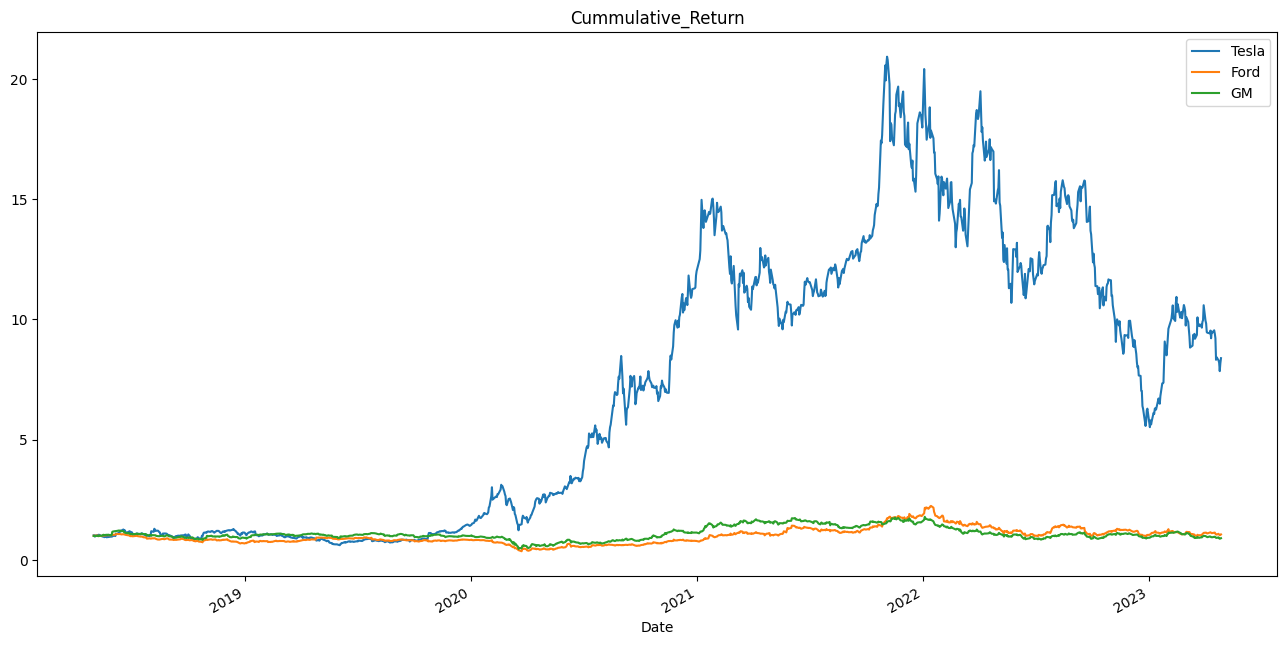

In [ ]:
pl = df
pl['TSLA_Cummulative_Return'].plot(label='Tesla',figsize=(16,8),title='Cummulative_Return')
pl['FORD_Cummulative_Return'].plot(label='Ford')
pl['GM_Cummulative_Return'].plot(label='GM')
plt.legend();

In [ ]:
#4. Unit of Analysis:- Cummulative Return
df.groupby('Year')[['TSLA_Cummulative_Return', 'FORD_Cummulative_Return','GM_Cummulative_Return']].mean()

,TSLA_Cummulative_Return,FORD_Cummulative_Return,GM_Cummulative_Return
Year,,,
2018,1.075797,0.888837,1.001143
2019,0.930691,0.821944,1.022400
2020,4.933601,0.626957,0.829659
2021,13.269727,1.265266,1.521061
2022,13.427685,1.323173,1.095093
2023,8.933387,1.109321,1.007382


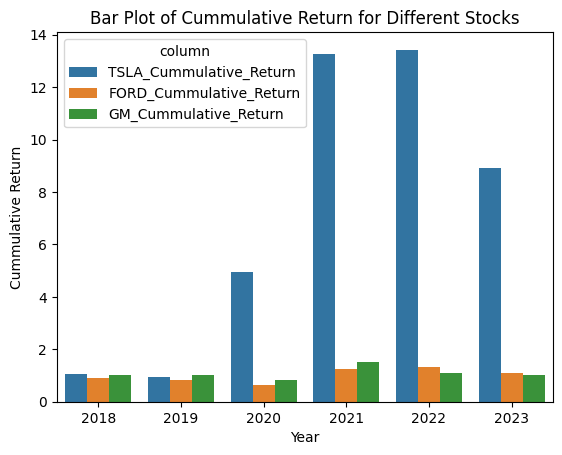

In [ ]:
pl=df.groupby('Year')[['TSLA_Cummulative_Return', 'FORD_Cummulative_Return','GM_Cummulative_Return']].mean()
pl.reset_index('Year', inplace=True)
pl_melted = pd.melt(pl, id_vars=['Year'], var_name='column', value_name='value')
sns.barplot(x='Year', y='value', hue='column', data=pl_melted)
plt.title('Bar Plot of Cummulative Return for Different Stocks')
plt.xlabel('Year')
plt.ylabel('Cummulative Return')
plt.show()

In [ ]:
pl=df
pl.reset_index('Date', inplace=True)
pl['Month'] = pl['Date'].dt.month

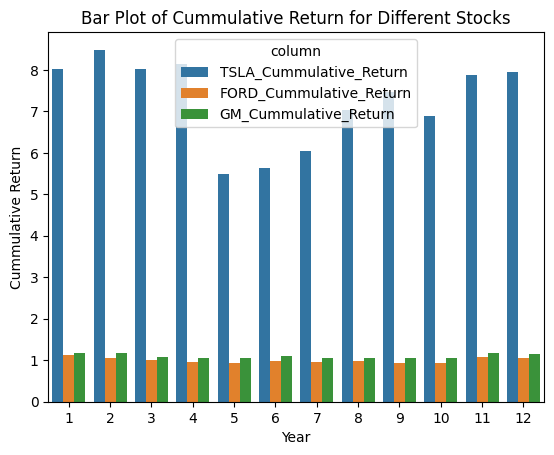

In [ ]:
pl=pl.groupby('Month')[['TSLA_Cummulative_Return', 'FORD_Cummulative_Return','GM_Cummulative_Return']].mean()
pl.reset_index('Month', inplace=True)
pl_melted = pd.melt(pl, id_vars=['Month'], var_name='column', value_name='value')
sns.barplot(x='Month', y='value', hue='column', data=pl_melted)
plt.title('Bar Plot of Cummulative Return for Different Stocks')
plt.xlabel('Year')
plt.ylabel('Cummulative Return')
plt.show()

#Get revenue data through webscraping

In [ ]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

In [ ]:
soup = BeautifulSoup(html_data, "html.parser")
soup.find_all('title')

[<title>Tesla Revenue 2010-2023 | TSLA | MacroTrends</title>]

In [ ]:
# Create an empty pandas DataFrame with two columns: "Date" and "TSLA_Revenue"
TSLA_rev = pd.DataFrame(columns = ['Date', 'TSLA_Revenue'])
# Loop through all of the "tbody" elements in the HTML document's soup object,
# and then loop through all of the "tr" elements within each "tbody"
for row in soup.find_all("tbody")[1].find_all("tr"):
    
    # Within each "tr" element, find all of the "td" elements
    col = row.find_all("td")
    
    # Extract the text from the first "td" element, which contains the date,
    # and assign it to the "date" variable
    date = col[0].text
    
    # Extract the text from the second "td" element, which contains the revenue,
    # and remove any dollar signs or commas that might be present in the text.
    # Then assign the resulting revenue value to the "revenue" variable.
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    # Append a new row to the TSLA_rev DataFrame, with the date and revenue values
    # from the current iteration of the loop. The "ignore_index = True" argument
    # ensures that each row gets a unique index number.
    TSLA_rev = TSLA_rev.append({"Date": date, "TSLA_Revenue": revenue}, ignore_index = True)

<ipython-input-38-214f136135ca>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TSLA_rev = TSLA_rev.append({"Date": date, "TSLA_Revenue": revenue}, ignore_index = True)
<ipython-input-38-214f136135ca>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TSLA_rev = TSLA_rev.append({"Date": date, "TSLA_Revenue": revenue}, ignore_index = True)
<ipython-input-38-214f136135ca>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TSLA_rev = TSLA_rev.append({"Date": date, "TSLA_Revenue": revenue}, ignore_index = True)
<ipython-input-38-214f136135ca>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TSLA_rev = TSLA_rev.append({"Date": date, "TSLA_Reven

In [ ]:
TSLA_rev.dropna(inplace=True)
TSLA_rev = TSLA_rev[TSLA_rev['TSLA_Revenue'] != ""]

In [ ]:
url1 = "https://www.macrotrends.net/stocks/charts/F/ford-motor/revenue"
html_data1 = requests.get(url1).text

In [ ]:
soup = BeautifulSoup(html_data1, "html.parser")
soup.find_all('title')

[<title>Ford Motor Revenue 2010-2023 | F | MacroTrends</title>]

In [ ]:
Ford_rev = pd.DataFrame(columns = ['Date', 'Ford_Revenue'])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    Ford_rev = Ford_rev.append({"Date": date, "Ford_Revenue": revenue}, ignore_index = True)

<ipython-input-43-1fba14b0a70b>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Ford_rev = Ford_rev.append({"Date": date, "Ford_Revenue": revenue}, ignore_index = True)
<ipython-input-43-1fba14b0a70b>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Ford_rev = Ford_rev.append({"Date": date, "Ford_Revenue": revenue}, ignore_index = True)
<ipython-input-43-1fba14b0a70b>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Ford_rev = Ford_rev.append({"Date": date, "Ford_Revenue": revenue}, ignore_index = True)
<ipython-input-43-1fba14b0a70b>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Ford_rev = Ford_rev.append({"Date": date, "Ford_Reven

In [ ]:
Ford_rev.dropna(inplace=True)
Ford_rev = Ford_rev[Ford_rev['Ford_Revenue'] != ""]

In [ ]:
url = "https://www.macrotrends.net/stocks/charts/GM/general-motors/revenue"
html_data = requests.get(url).text

In [ ]:
soup = BeautifulSoup(html_data, "html.parser")
soup.find_all('title')

[<title>General Motors Revenue 2010-2023 | GM | MacroTrends</title>]

In [ ]:
GM_rev = pd.DataFrame(columns = ['Date', 'GM_Revenue'])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    GM_rev = GM_rev.append({"Date": date, "GM_Revenue": revenue}, ignore_index = True)

<ipython-input-48-0043b05a87bd>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GM_rev = GM_rev.append({"Date": date, "GM_Revenue": revenue}, ignore_index = True)
<ipython-input-48-0043b05a87bd>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GM_rev = GM_rev.append({"Date": date, "GM_Revenue": revenue}, ignore_index = True)
<ipython-input-48-0043b05a87bd>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GM_rev = GM_rev.append({"Date": date, "GM_Revenue": revenue}, ignore_index = True)
<ipython-input-48-0043b05a87bd>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GM_rev = GM_rev.append({"Date": date, "GM_Revenue": revenue}, ignore_in

In [ ]:
GM_rev.dropna(inplace=True)
GM_rev = GM_rev[GM_rev['GM_Revenue'] != ""]

In [ ]:
TSLA_rev['Date'] = pd.to_datetime(TSLA_rev['Date'])
Ford_rev['Date'] = pd.to_datetime(Ford_rev['Date'])
GM_rev['Date'] = pd.to_datetime(GM_rev['Date'])

In [ ]:
merged_df_rev = pd.merge(TSLA_rev, Ford_rev, on='Date', how='inner')
df_rev = pd.merge(merged_df_rev, GM_rev, on='Date', how='inner')

In [ ]:
df_rev['Year'] = df_rev['Date'].dt.year

In [ ]:
#6. Unit of Analysis- Revenue
df_rev.groupby('Year')[['TSLA_Revenue', 'Ford_Revenue','GM_Revenue']].mean()

,TSLA_Revenue,Ford_Revenue,GM_Revenue
Year,,,
2010,9.078205e+06,8.107075e+18,9.225085e+18
2011,9.896462e+06,8.479333e+18,9.497592e+18
2012,7.662568e+07,8.932830e+18,9.826844e+18
2013,1.538579e+11,9.392589e+18,1.012135e+19
2014,2.394632e+11,8.967587e+18,9.904348e+18
2015,3.037345e+11,1.006285e+19,5.747597e+18
2016,5.713075e+14,9.663590e+18,8.911847e+18
2017,8.220746e+14,1.033159e+19,9.428834e+18
2018,1.806671e+15,1.044834e+19,9.599839e+18


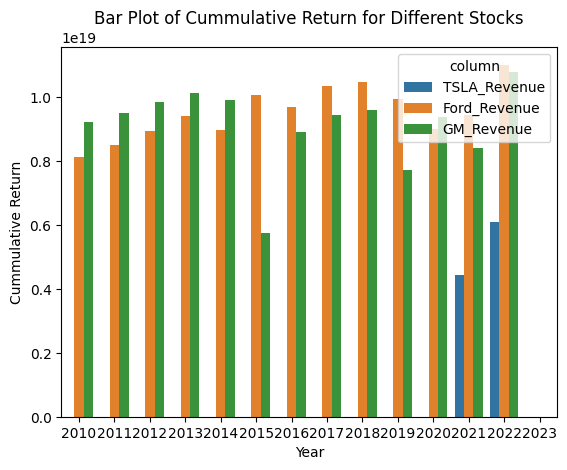

In [ ]:
pl=df_rev.groupby('Year')[['TSLA_Revenue', 'Ford_Revenue','GM_Revenue']].mean()
pl.reset_index('Year', inplace=True)
pl_melted = pd.melt(pl, id_vars=['Year'], var_name='column', value_name='value')
sns.barplot(x='Year', y='value', hue='column', data=pl_melted)
plt.title('Bar Plot of Cummulative Return for Different Stocks')
plt.xlabel('Year')
plt.ylabel('Cummulative Return')
plt.show()